In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

# Load dataset from CSV
file_path = 'Traffic_Crashes_-_Crashes.csv'  # Adjust this path to your downloaded file
df = pd.read_csv(file_path)

print("Original dataset shape:", df.shape)
print("First few rows of the dataset:")
print(df.head())

Original dataset shape: (923426, 48)
First few rows of the dataset:
                                     CRASH_RECORD_ID CRASH_DATE_EST_I  \
0  00a530520c84927490b597a6220ff3f2a3347472ef3086...              NaN   
1  027187f52f9cac9ec542f1dda3a9ca8804db1fc2d2a386...              NaN   
2  204c3ca48ff3cdf0737e7f10b54ef5f8c49fbe30b5e53e...              NaN   
3  0173d218723a1d608d77b7142ca9b9a4afd7463e824162...                Y   
4  0386ef145c229cc3cb409c51d647b6496ab660104f16c7...              NaN   

               CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
0  01/15/2025 01:50:00 PM                  30            NO CONTROLS   
1  05/31/2020 01:13:00 AM                  30         TRAFFIC SIGNAL   
2  12/04/2024 05:39:00 PM                  30                UNKNOWN   
3  09/23/2023 10:39:00 AM                  30         TRAFFIC SIGNAL   
4  06/26/2023 01:54:00 PM                  30            NO CONTROLS   

       DEVICE_CONDITION WEATHER_CONDITION      LIGHTING_COND

In [2]:
# Check missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)



Missing values in each column:
CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 855486
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         724403
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       29161
CRASH_TYPE                            0
INTERSECTION_RELATED_I           711106
NOT_RIGHT_OF_WAY_I               881492
HIT_AND_RUN_I                    633871
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_D

In [3]:
# Define valid latitude and longitude range for Chicago
LATITUDE_RANGE = (41.6, 42.1)
LONGITUDE_RANGE = (-88.0, -87.5)

# Fill missing latitude and longitude with their averages
latitude_mean = df['LATITUDE'].mean()
longitude_mean = df['LONGITUDE'].mean()
df['latitude'] = df['LATITUDE'].fillna(latitude_mean)
df['longitude'] = df['LONGITUDE'].fillna(longitude_mean)

# Keep only rows within valid Chicago range
df = df[(df['latitude'] >= LATITUDE_RANGE[0]) & (df['latitude'] <= LATITUDE_RANGE[1])]
df = df[(df['longitude'] >= LONGITUDE_RANGE[0]) & (df['longitude'] <= LONGITUDE_RANGE[1])]

# Drop original LATITUDE and LONGITUDE columns
df = df.drop(columns=['LATITUDE', 'LONGITUDE'])

# Create location column
df['location'] = 'POINT (' + df['longitude'].astype(str) + ' ' + df['latitude'].astype(str) + ')'

In [4]:
df['posted_speed_limit'] = df['POSTED_SPEED_LIMIT'].fillna(df['POSTED_SPEED_LIMIT'].median())
df['weather_condition'] = df['WEATHER_CONDITION'].fillna('UNKNOWN')
df['lighting_condition'] = df['LIGHTING_CONDITION'].fillna('UNKNOWN')
df['roadway_surface_cond'] = df['ROADWAY_SURFACE_COND'].fillna('UNKNOWN')
df['report_type'] = df['REPORT_TYPE'].fillna('UNKNOWN')
df['street_direction'] = df['STREET_DIRECTION'].fillna('UNKNOWN')
df['street_name'] = df['STREET_NAME'].fillna('UNKNOWN')
df['beat_of_occurrence'] = df['BEAT_OF_OCCURRENCE'].fillna(df['BEAT_OF_OCCURRENCE'].median())
df['most_severe_injury'] = df['MOST_SEVERE_INJURY'].fillna('UNKNOWN')
df['injuries_total'] = df['INJURIES_TOTAL'].fillna(0)
df['injuries_fatal'] = df['INJURIES_FATAL'].fillna(0)
df['injuries_incapacitating'] = df['INJURIES_INCAPACITATING'].fillna(0)
df['injuries_non_incapacitating'] = df['INJURIES_NON_INCAPACITATING'].fillna(0)
df['injuries_reported_not_evident'] = df['INJURIES_REPORTED_NOT_EVIDENT'].fillna(0)
df['injuries_no_indication'] = df['INJURIES_NO_INDICATION'].fillna(0)
df['injuries_unknown'] = df['INJURIES_UNKNOWN'].fillna(0)

# Drop original columns after filling
df = df.drop(columns=['POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
                      'ROADWAY_SURFACE_COND', 'REPORT_TYPE', 'STREET_DIRECTION',
                      'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'MOST_SEVERE_INJURY',
                      'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
                      'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
                      'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN'])

# Remove any remaining missing values
df = df.dropna()

print("Shape after handling missing values:", df.shape)


Shape after handling missing values: (916588, 38)


In [5]:
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Shape after removing duplicates: (916588, 38)


In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df.loc[:, ~df.columns.duplicated()]  # Remove duplicate columns

print("\nStandardized column names:")
print(df.columns.tolist())



Standardized column names:
['crash_record_id', 'crash_date', 'traffic_control_device', 'device_condition', 'first_crash_type', 'trafficway_type', 'alignment', 'road_defect', 'crash_type', 'damage', 'date_police_notified', 'prim_contributory_cause', 'sec_contributory_cause', 'street_no', 'num_units', 'crash_hour', 'crash_day_of_week', 'crash_month', 'location', 'latitude', 'longitude', 'posted_speed_limit', 'weather_condition', 'lighting_condition', 'roadway_surface_cond', 'report_type', 'street_direction', 'street_name', 'beat_of_occurrence', 'most_severe_injury', 'injuries_total', 'injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 'injuries_reported_not_evident', 'injuries_no_indication', 'injuries_unknown']


In [7]:
df['crash_date'] = pd.to_datetime(df['crash_date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['crash_hour'] = df['crash_date'].dt.hour
df['crash_day_of_week'] = df['crash_date'].dt.day_name()
df['crash_month'] = df['crash_date'].dt.month
df['crash_year'] = df['crash_date'].dt.year


In [8]:
# Handle inconsistent data entries
# Standardize weather conditions
weather_fix = {
    'CLEAR': 'CLEAR',
    'CLOUDY/OVERCAST': 'CLOUDY',
    'RAIN': 'RAIN',
    'SNOW': 'SNOW',
    'FOG/SMOKE/HAZE': 'FOG',
    'SLEET/HAIL': 'SLEET',
    'FREEZING RAIN/DRIZZLE': 'FREEZING RAIN',
    'OTHER': 'UNKNOWN',
    'BLOWING SAND, SOIL, DIRT': 'BLOWING SAND',
    'BLOWING SNOW': 'SNOW',
    'SEVERE CROSS WIND GATE': 'WINDY'
}
df['weather_condition'] = df['weather_condition'].replace(weather_fix).fillna('UNKNOWN')

# Verify the weather_condition categories
print("\nUnique weather conditions after mapping:")
print(df['weather_condition'].unique())

# Normalize roadway_surface_cond (convert to uppercase, strip spaces)
df['roadway_surface_cond'] = df['roadway_surface_cond'].str.upper().str.strip()

# Standardize roadway surface conditions
df['roadway_surface_cond'] = df['roadway_surface_cond'].replace({
    'DRY': 'DRY',
    'WET': 'WET',
    'SNOW OR SLUSH': 'SNOW',
    'ICE': 'ICE',
    'UNKNOWN': 'UNKNOWN',
    'OTHER': 'UNKNOWN',
    'SAND, MUD, DIRT': 'MUDDY'
}).fillna('UNKNOWN')

# Verify the roadway_surface_cond categories
print("\nUnique roadway surface conditions after mapping:")
print(df['roadway_surface_cond'].unique())


Unique weather conditions after mapping:
['CLEAR' 'UNKNOWN' 'RAIN' 'CLOUDY' 'SNOW' 'FREEZING RAIN' 'FOG'
 'BLOWING SAND' 'SLEET' 'WINDY']

Unique roadway surface conditions after mapping:
['DRY' 'UNKNOWN' 'WET' 'ICE' 'SNOW' 'MUDDY']


In [9]:
df = df[(df['posted_speed_limit'] >= 0) & (df['posted_speed_limit'] <= 100)]
print("Shape after outlier removal:", df.shape)


Shape after outlier removal: (916588, 38)


In [10]:
df.to_csv('clean_chicago_traffic.csv', index=False, date_format='%Y-%m-%d %H:%M:%S')
print("Cleaned dataset saved as 'clean_chicago_traffic.csv'")


Cleaned dataset saved as 'clean_chicago_traffic.csv'


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare data
clean_df = pd.read_csv(r"C:\Users\tirth\Downloads\Python\clean_chicago_traffic.csv")

# Convert crash_date to datetime format
clean_df['crash_date'] = pd.to_datetime(clean_df['crash_date'])
clean_df['hour'] = clean_df['crash_date'].dt.hour
clean_df['day'] = clean_df['crash_date'].dt.day_name()
clean_df['month'] = clean_df['crash_date'].dt.month
clean_df['year'] = clean_df['crash_date'].dt.year

print("Dataset shape:", clean_df.shape)


Dataset shape: (916588, 42)


In [12]:
# Function to create bar plots
def create_bar_plot(data, title, xlabel, ylabel, rotate=0, horizontal=False):
    plt.figure(figsize=(10, 6))
    if horizontal:
        data.plot(kind='barh')
    else:
        data.plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotate)
    plt.tight_layout()
    plt.show()


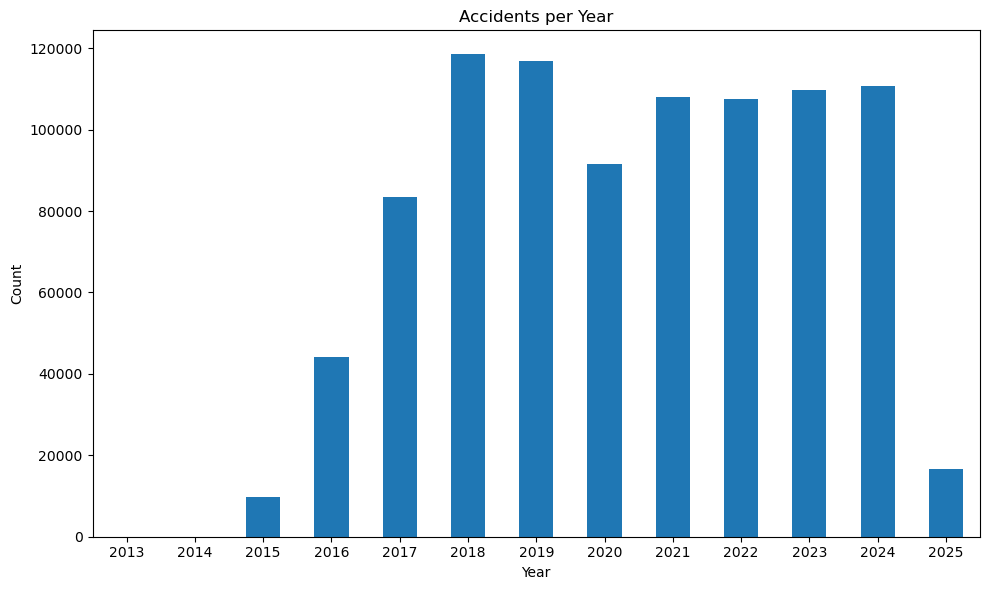

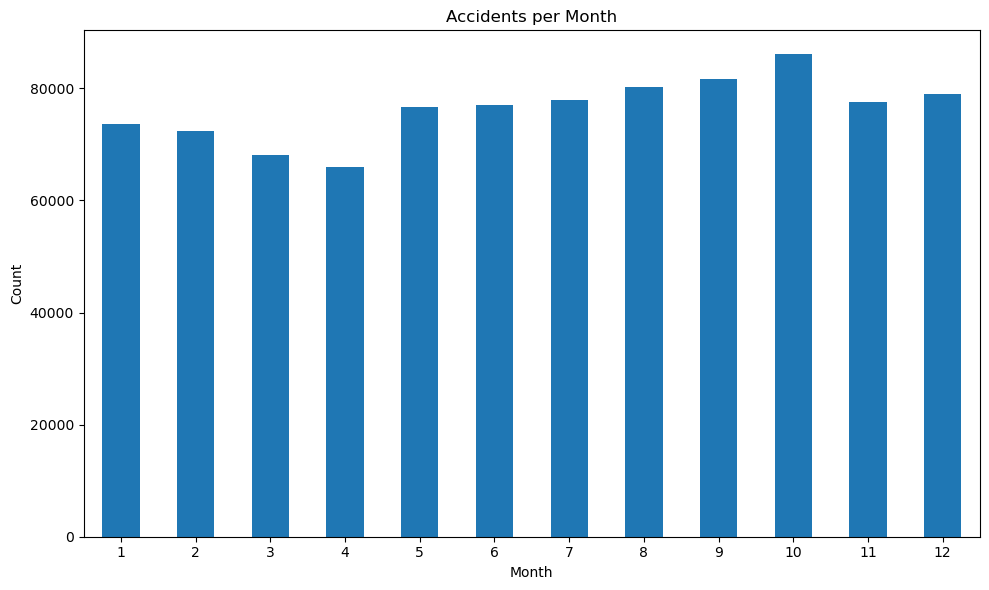

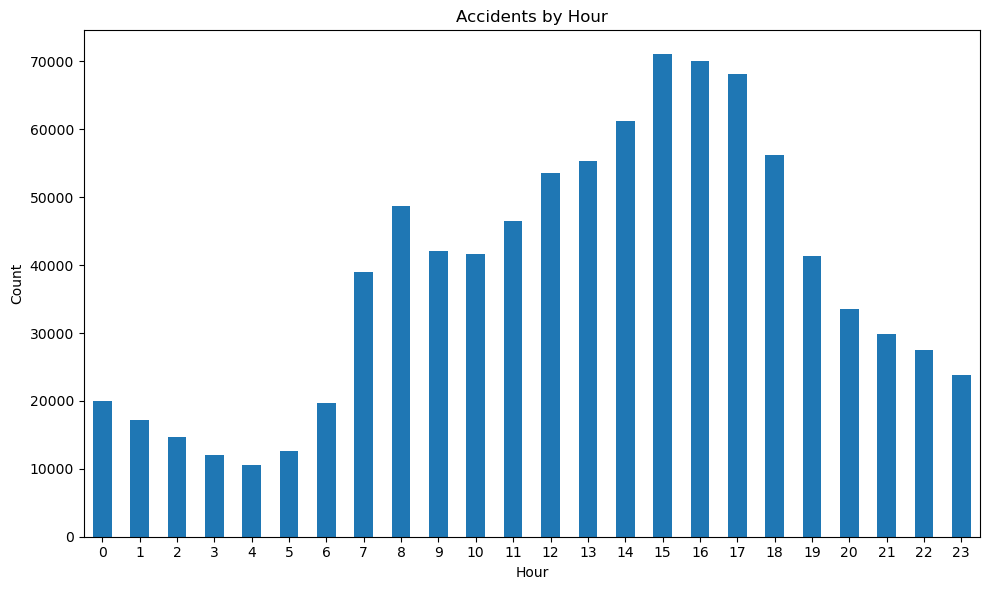

In [13]:
# Accidents per year, month, and hour
create_bar_plot(clean_df['year'].value_counts().sort_index(), 'Accidents per Year', 'Year', 'Count')
create_bar_plot(clean_df['month'].value_counts().sort_index(), 'Accidents per Month', 'Month', 'Count')
create_bar_plot(clean_df['hour'].value_counts().sort_index(), 'Accidents by Hour', 'Hour', 'Count')


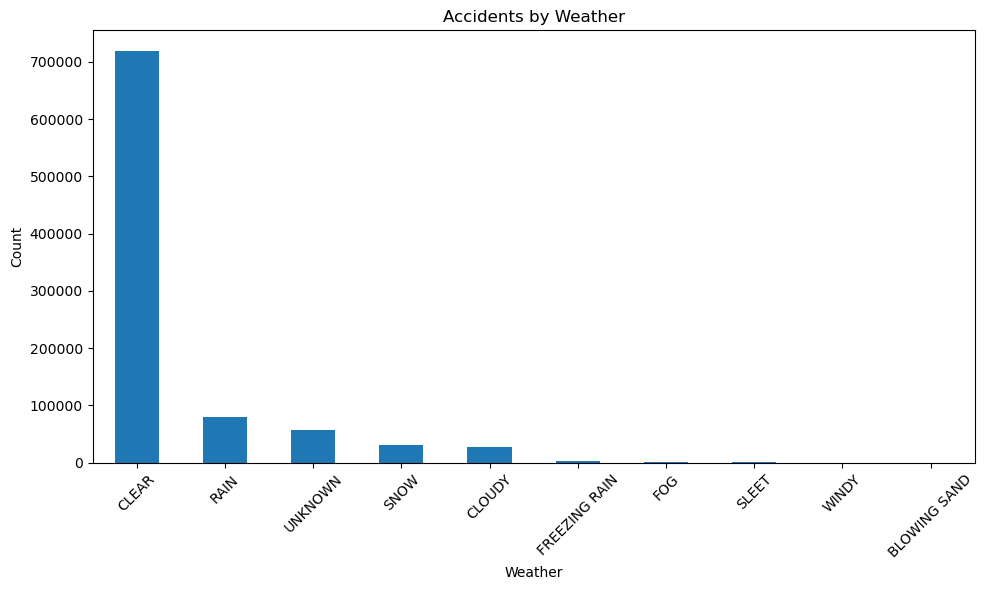

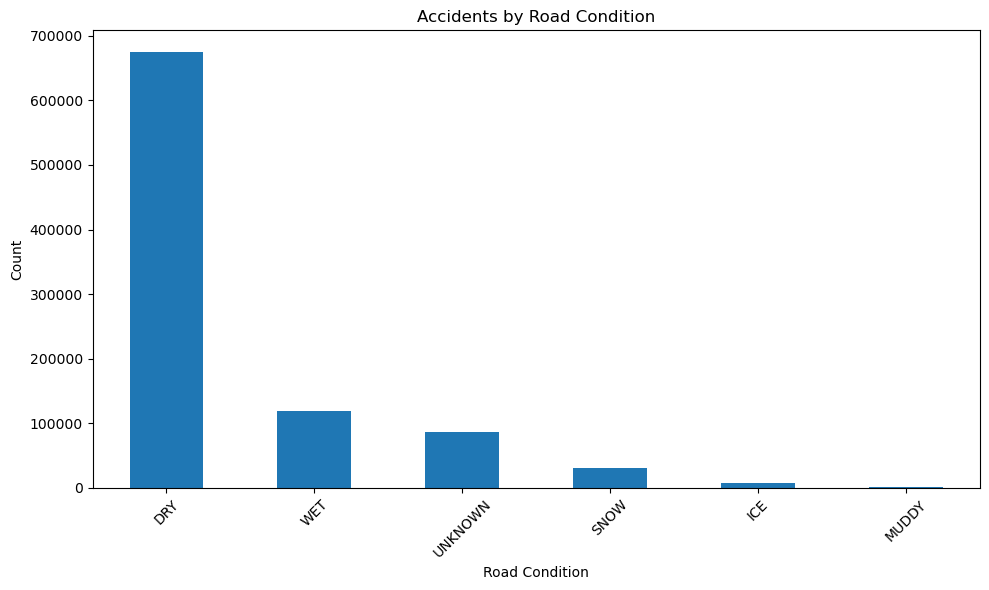

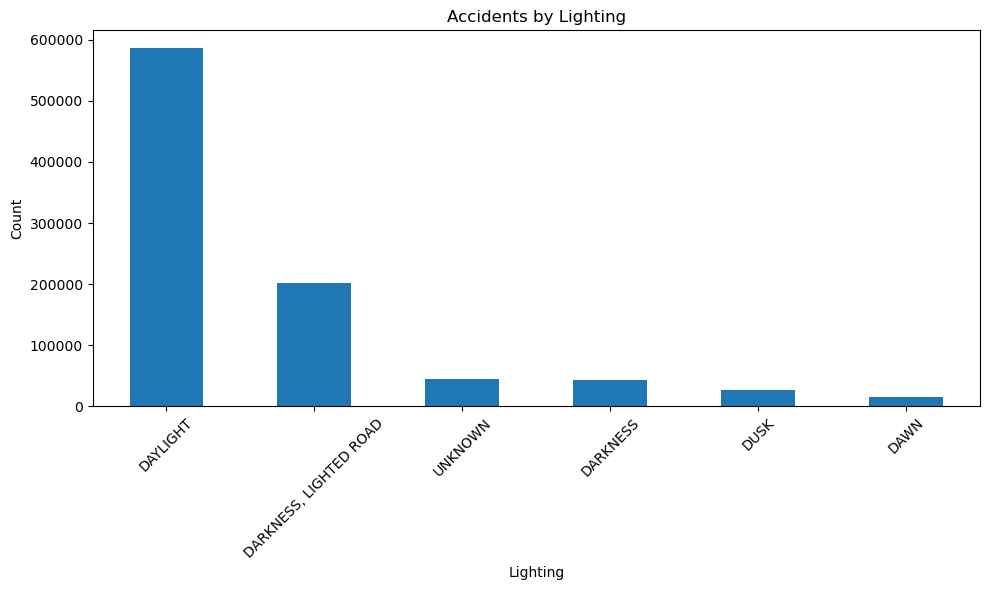

In [14]:
# Accidents by weather, road, and lighting conditions
create_bar_plot(clean_df['weather_condition'].value_counts(), 'Accidents by Weather', 'Weather', 'Count', 45)
create_bar_plot(clean_df['roadway_surface_cond'].value_counts(), 'Accidents by Road Condition', 'Road Condition', 'Count', 45)
create_bar_plot(clean_df['lighting_condition'].value_counts(), 'Accidents by Lighting', 'Lighting', 'Count', 45)


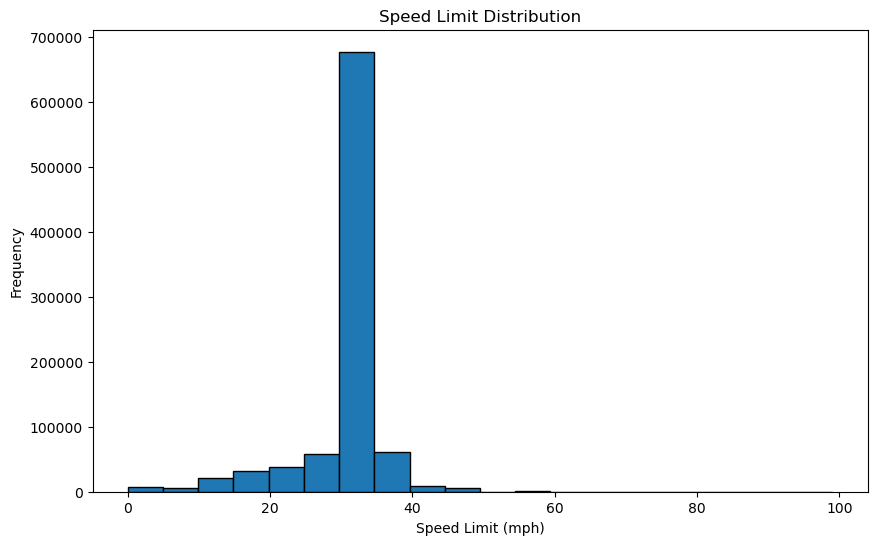

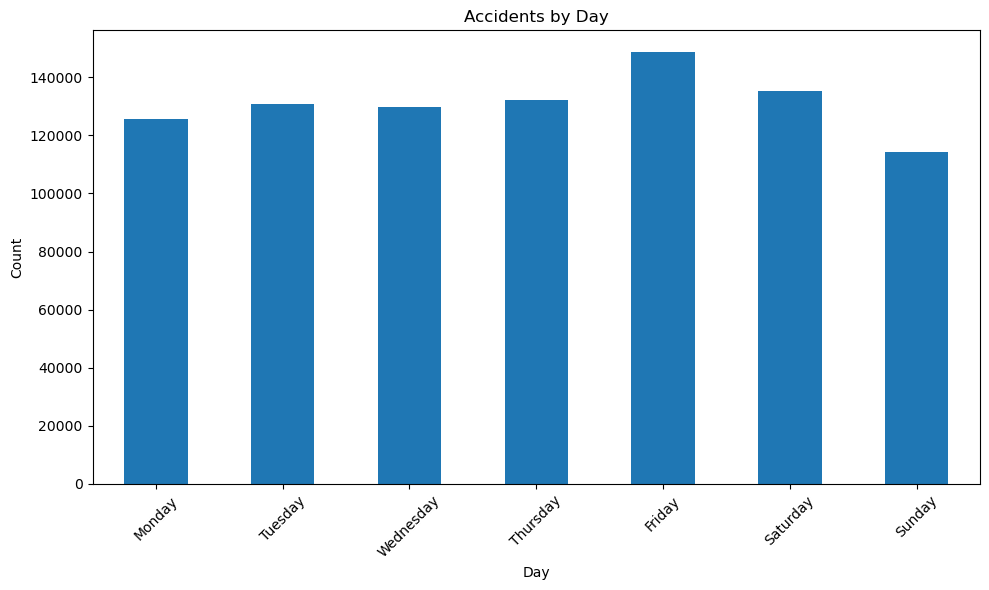

In [15]:
# Speed limit distribution
plt.figure(figsize=(10, 6))
plt.hist(clean_df['posted_speed_limit'], bins=20, edgecolor='black')
plt.title('Speed Limit Distribution')
plt.xlabel('Speed Limit (mph)')
plt.ylabel('Frequency')
plt.show()

# Accidents by day of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
create_bar_plot(clean_df['day'].value_counts().reindex(day_order), 'Accidents by Day', 'Day', 'Count', 45)


<Figure size 1200x600 with 0 Axes>

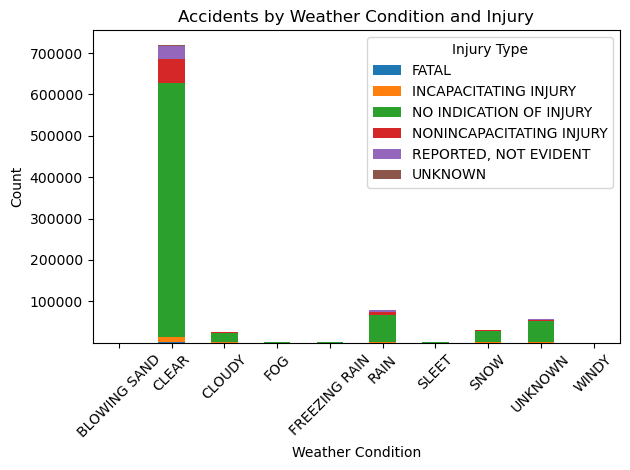

<Figure size 1200x600 with 0 Axes>

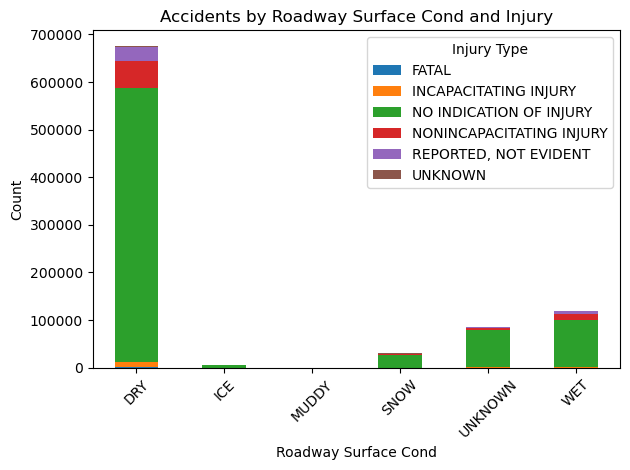

In [16]:
# Accidents by weather condition and injury type
for condition in ['weather_condition', 'roadway_surface_cond']:
    plt.figure(figsize=(12, 6))
    clean_df.groupby([condition, 'most_severe_injury']).size().unstack().plot(kind='bar', stacked=True)
    plt.title(f'Accidents by {condition.replace("_", " ").title()} and Injury')
    plt.xlabel(condition.replace("_", " ").title())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Injury Type')
    plt.tight_layout()
    plt.show()


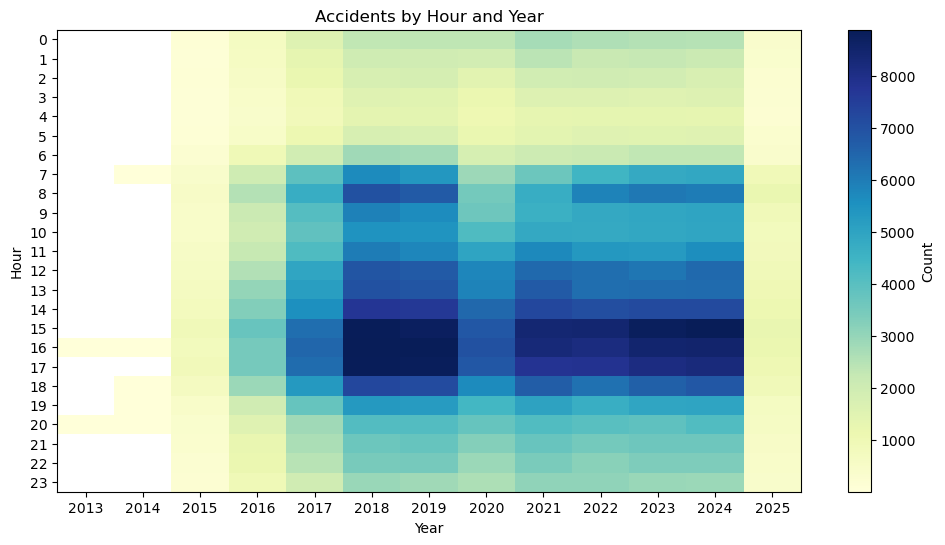

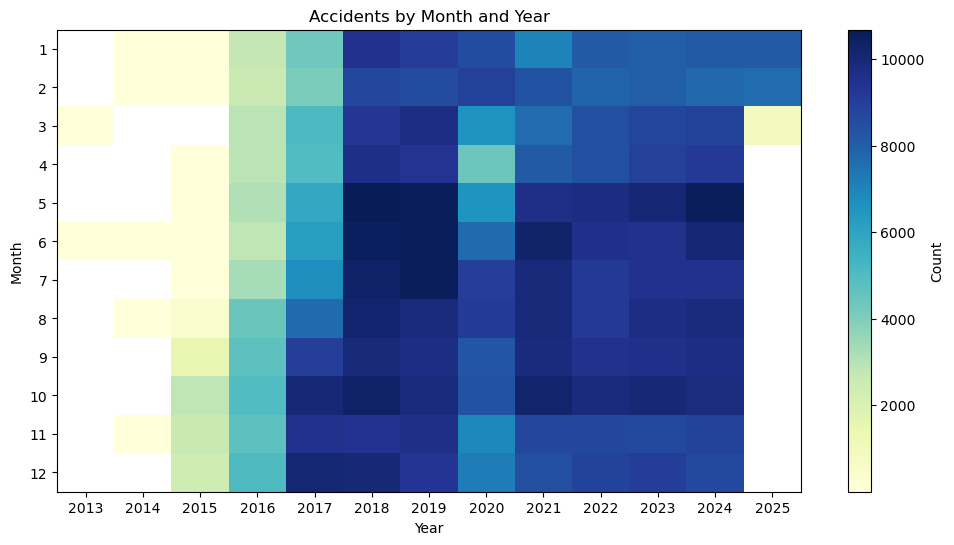

In [17]:
for time_unit in ['hour', 'month']:
    plt.figure(figsize=(12, 6))
    pivot = clean_df.pivot_table(index=time_unit, columns='year', values='crash_record_id', aggfunc='count')
    plt.imshow(pivot, cmap='YlGnBu', aspect='auto')
    plt.colorbar(label='Count')
    plt.title(f'Accidents by {time_unit.capitalize()} and Year')
    plt.xlabel('Year')
    plt.ylabel(time_unit.capitalize())
    plt.xticks(range(len(pivot.columns)), pivot.columns)
    plt.yticks(range(len(pivot.index)), pivot.index)
    plt.show()


<Figure size 1000x600 with 0 Axes>

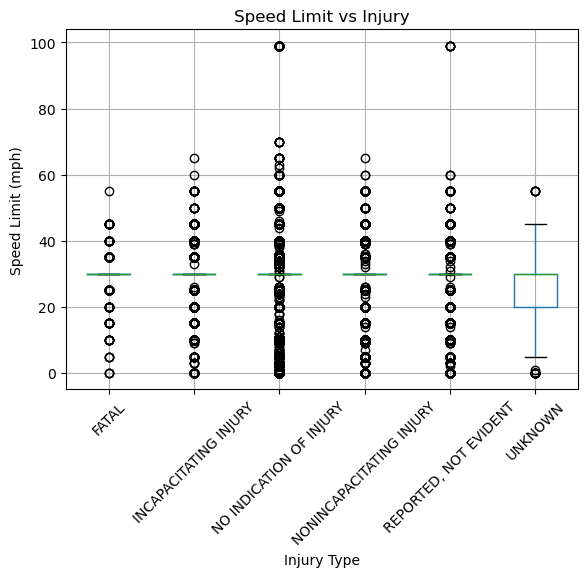

In [18]:
plt.figure(figsize=(10, 6))
clean_df.boxplot(column='posted_speed_limit', by='most_severe_injury')
plt.title('Speed Limit vs Injury')
plt.xlabel('Injury Type')
plt.ylabel('Speed Limit (mph)')
plt.xticks(rotation=45)
plt.suptitle('')
plt.show()


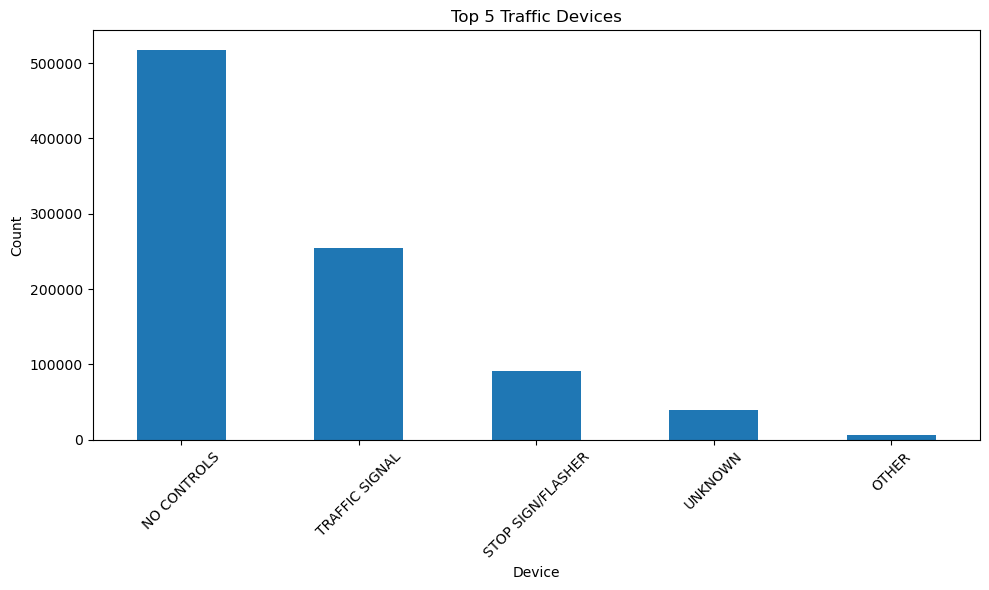

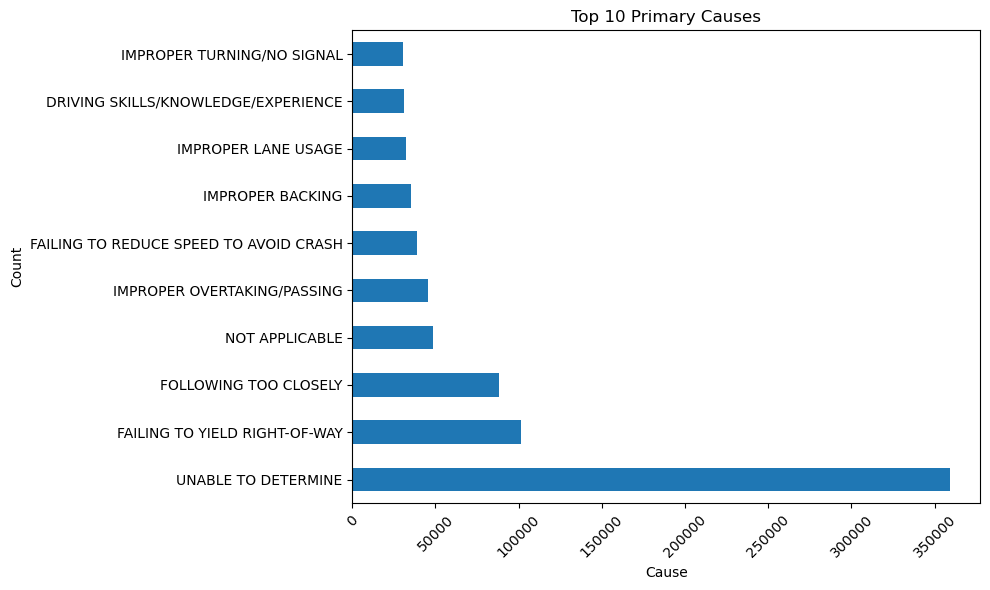

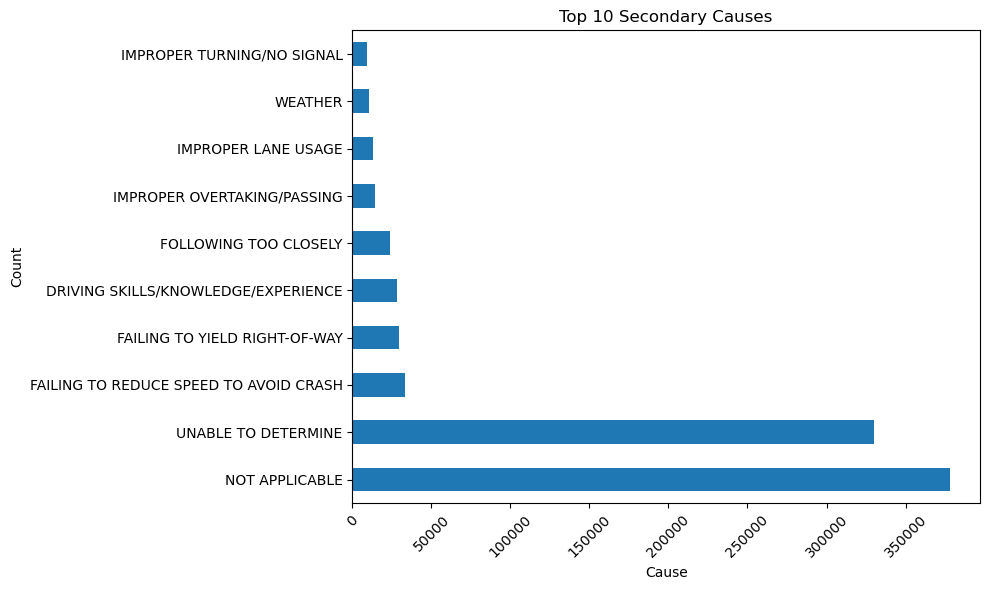

In [19]:
# Top Traffic Devices and Contributory Causes
create_bar_plot(clean_df['traffic_control_device'].value_counts()[:5], 'Top 5 Traffic Devices', 'Device', 'Count', 45)
create_bar_plot(clean_df['prim_contributory_cause'].value_counts()[:10], 'Top 10 Primary Causes', 'Cause', 'Count', 45, True)
create_bar_plot(clean_df['sec_contributory_cause'].value_counts()[:10], 'Top 10 Secondary Causes', 'Cause', 'Count', 45, True)


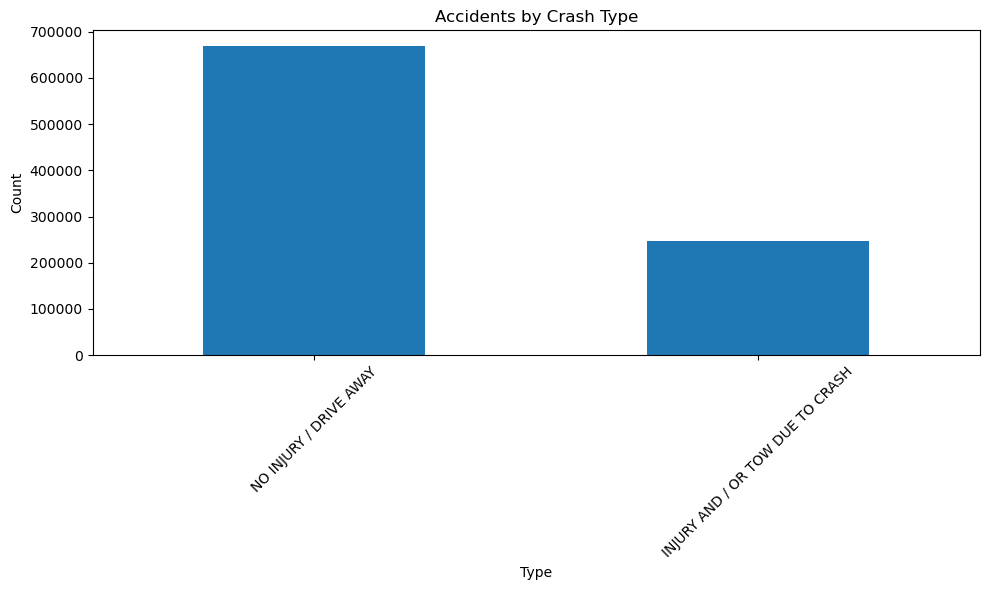

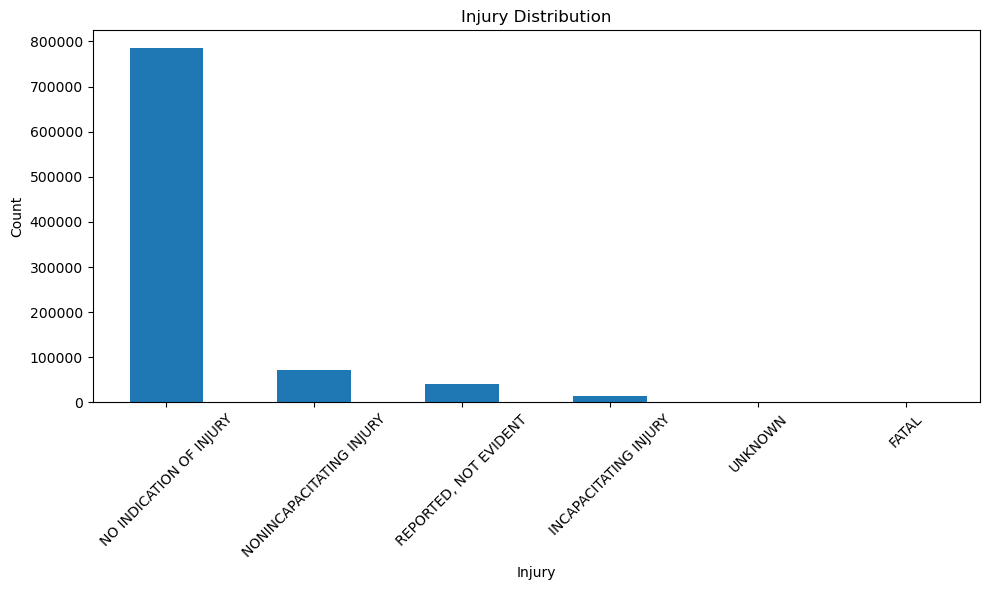

In [20]:
create_bar_plot(clean_df['crash_type'].value_counts(), 'Accidents by Crash Type', 'Type', 'Count', 45)
create_bar_plot(clean_df['most_severe_injury'].value_counts(), 'Injury Distribution', 'Injury', 'Count', 45)


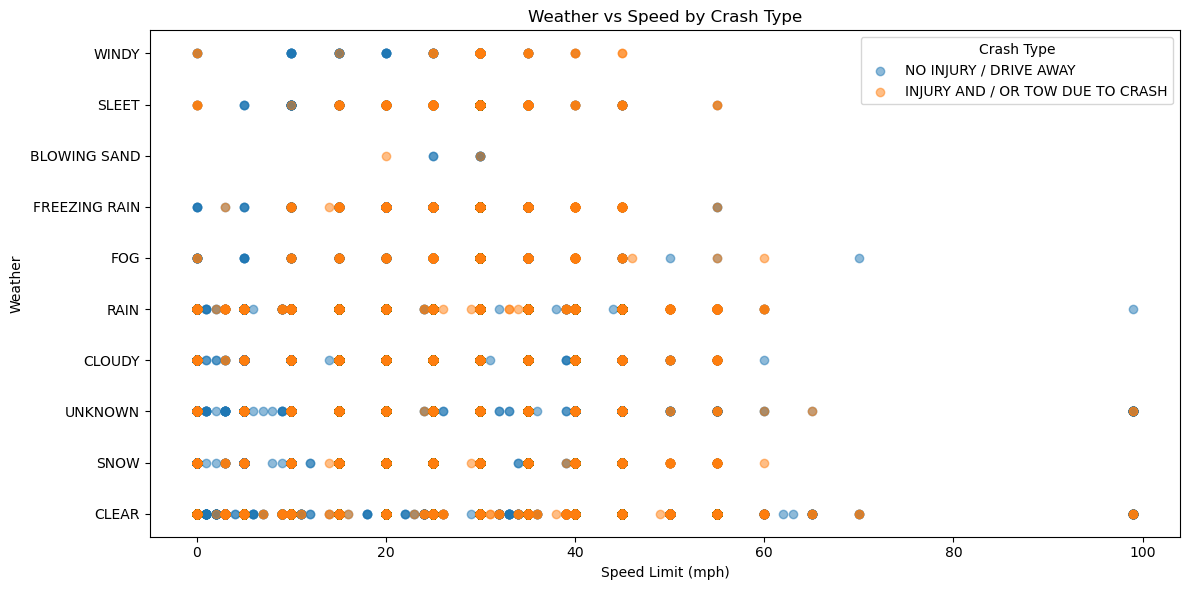

In [21]:
plt.figure(figsize=(12, 6))
for crash_type in clean_df['crash_type'].unique():
    subset = clean_df[clean_df['crash_type'] == crash_type]
    plt.scatter(subset['posted_speed_limit'], subset['weather_condition'], alpha=0.5, label=crash_type)

plt.title('Weather vs Speed by Crash Type')
plt.xlabel('Speed Limit (mph)')
plt.ylabel('Weather')
plt.legend(title='Crash Type')
plt.tight_layout()
plt.show()


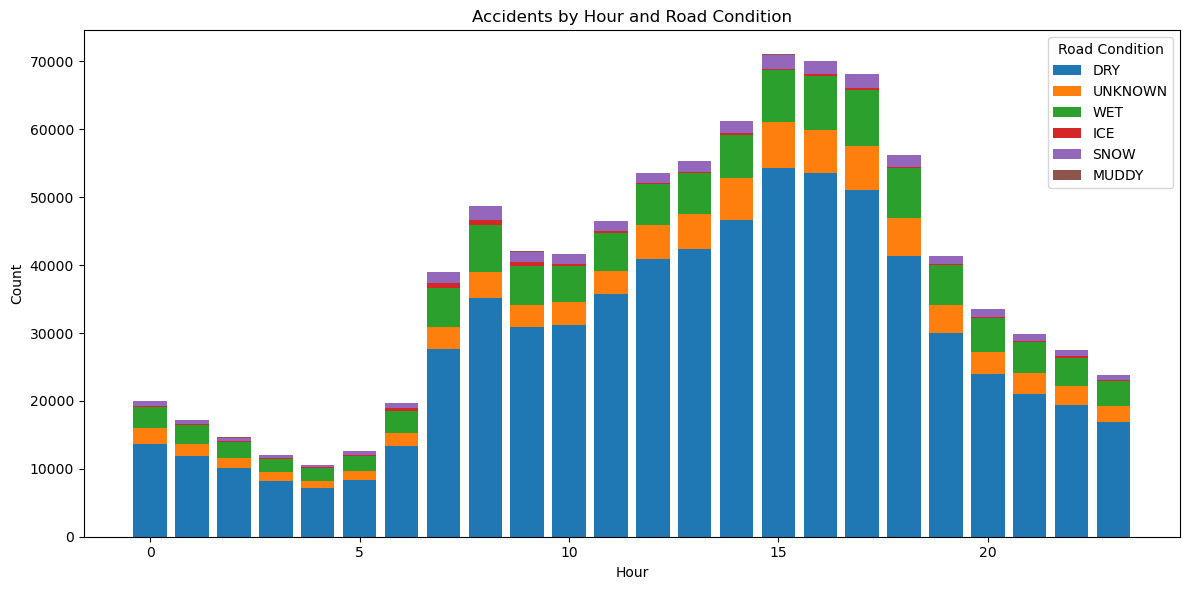

In [22]:
plt.figure(figsize=(12, 6))
bottom = np.zeros(24)

for condition in clean_df['roadway_surface_cond'].unique():
    counts = clean_df[clean_df['roadway_surface_cond'] == condition]['hour'].value_counts().reindex(range(24), fill_value=0)
    plt.bar(range(24), counts, bottom=bottom, label=condition)
    bottom += counts

plt.title('Accidents by Hour and Road Condition')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(title='Road Condition')
plt.tight_layout()
plt.show()
